In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Data/perceptron_data.csv")
df.head()

,x1,x2,class
0,2.339126,1.584585,1.0
1,1.557974,-0.570345,1.0
2,3.782852,4.813774,1.0
3,4.871110,4.768648,1.0
4,-0.024954,1.350122,1.0


In [4]:
X = np.hstack((np.array(df['x1']).reshape(-1,1), np.array(df['x2']).reshape(-1,1)))
X[:5]

array([[ 2.33912642,  1.58458486],
       [ 1.55797438, -0.57034486],
       [ 3.78285229,  4.81377415],
       [ 4.87110971,  4.76864808],
       [-0.02495416,  1.35012155]])

In [5]:
X.shape

(500, 2)

In [6]:
y = np.array(df['class']).reshape(-1,1)
y[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

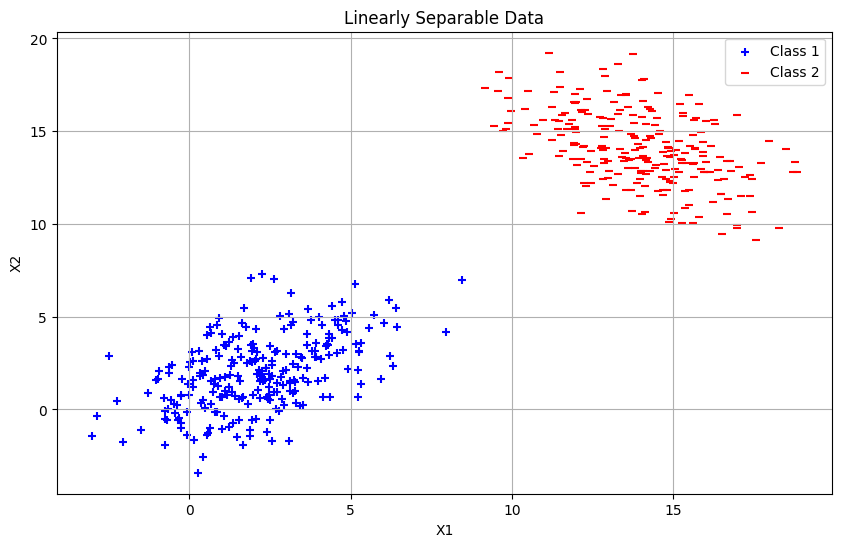

In [7]:

# Plotting the line of the optimal hyperplane
plt.figure(figsize=(10, 6))
plt.scatter(X[:250][:, 0], X[:250][:, 1], color='blue', label='Class 1', marker="+")
plt.scatter(X[250:][:, 0], X[250:][:, 1], color='red', label='Class 2', marker="_")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
class Perceptron:
    def __init__(self, learning_rate=1e-3, epsilon=1e-2, max_iters=1e5):
        self.w = 0
        self.b = 1
        self.grad_w = 0
        self.grad_b = 1
        self.lr = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.prevError = np.inf

    def fit(self, X, y):
        _, num_features = X.shape

        self.w = np.random.rand(num_features)
        self.grad_w = np.random.rand(num_features)

        num_iters = 0
        while(num_iters < self.max_iters and np.abs(self.prevError - self.evaluate(X,y)) > self.epsilon):
            self.prevError = self.evaluate(X,y)
            # calculate gradients
            self.grad_w, self.grad_b = self.calc_gradients(X, y)

            # update w and b values
            self.w = self.w - self.lr * self.grad_w
            self.b = self.b - self.lr * self.grad_b

            num_iters += 1

        print("Ran for ", num_iters, " iterations")

    def calc_gradients(self, X, y):
        new_grad_w = 0
        new_grad_b = 0
        for i in range(len(y)):
            res = (np.dot(self.w, X[i]) + self.b) * y[i]
            if res < 0:
                new_grad_w += y[i] * X[i]
                new_grad_b += y[i]

        new_grad_w *= -1
        new_grad_b *= -1

        return new_grad_w, new_grad_b

    def predict(self, X):
        pred_y = [1 if (np.dot(self.w, x) + self.b) > 0 else -1 for x in X]
        return pred_y

    def evaluate(self, X, y):
        loss = sum(max(0, -y[i]*(np.dot(self.w, X[i])+self.b)) for i in range(len(y)))
        print("loss: ", loss)
        return loss
        

In [9]:
perceptron_classifier = Perceptron()
perceptron_classifier.fit(X, y)

loss:  [4319.42910324]
loss:  [4319.42910324]
loss:  [2981.41220254]
loss:  [2981.41220254]
loss:  [2357.35142353]
loss:  [2357.35142353]
loss:  [1738.1485942]
loss:  [1738.1485942]
loss:  [1129.15501047]
loss:  [1129.15501047]
loss:  [533.36225634]
loss:  [533.36225634]
loss:  [57.4673232]
loss:  [57.4673232]
loss:  [382.74019642]
loss:  [382.74019642]
loss:  [3076.22581193]
loss:  [3076.22581193]
loss:  [2455.42854839]
loss:  [2455.42854839]
loss:  [1843.0319826]
loss:  [1843.0319826]
loss:  [1241.5253854]
loss:  [1241.5253854]
loss:  [653.49373842]
loss:  [653.49373842]
loss:  [160.25267073]
loss:  [160.25267073]
loss:  [0.49741953]
loss:  [0.49741953]
loss:  [0.24878179]
loss:  [0.24878179]
loss:  [0.47962335]
loss:  [0.47962335]
loss:  [0.8417193]
loss:  [0.8417193]
loss:  0
loss:  0
loss:  0
Ran for  19  iterations


In [10]:
print("slope: ", perceptron_classifier.w, " intercept: ", perceptron_classifier.b)

slope:  [ 0.03294135 -0.38362642]  intercept:  [2.724]


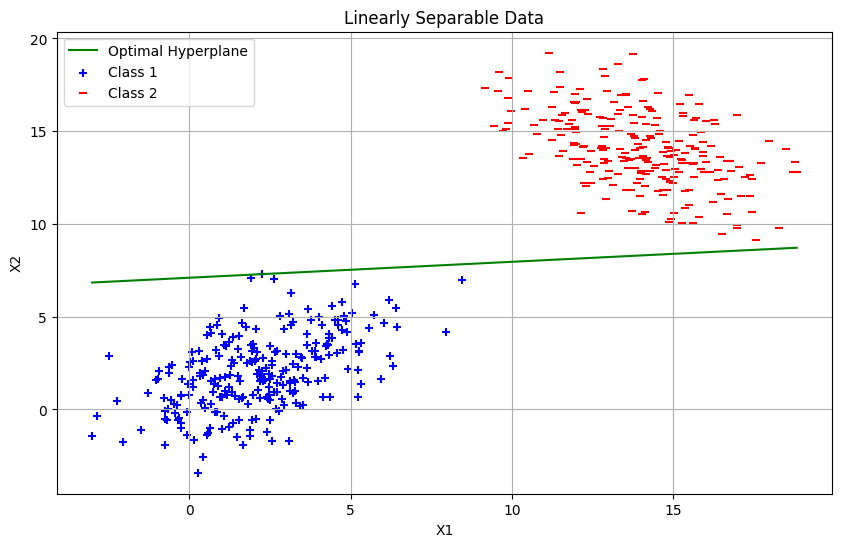

In [11]:
# Coefficients of the hyperplane
coefficients = perceptron_classifier.w

# Intercept of the hyperplane
intercept = perceptron_classifier.b

# Compute slope and intercept of the line
slope = -coefficients[0] / coefficients[1]
intercept = -intercept / coefficients[1]

# Generate data points for plotting the line
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
y_values = slope * x_values + intercept

# Plotting the line of the optimal hyperplane
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, color='green', linestyle='-', label='Optimal Hyperplane')
plt.scatter(X[:250][:, 0], X[:250][:, 1], color='blue', label='Class 1', marker="+")
plt.scatter(X[250:][:, 0], X[250:][:, 1], color='red', label='Class 2', marker="_")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()